# **TikTok Project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

In [221]:
import numpy as np
import pandas as pd
import platform
import statsmodels
print('Python version: ', platform.python_version())
print('numpy version: ', np.__version__)
print('pandas version: ', pd.__version__)
print('statsmodels version: ', statsmodels.__version__)

Python version:  3.11.4
numpy version:  1.24.4
pandas version:  2.0.3
statsmodels version:  0.14.0


You are a data professional at TikTok. The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 5 End-of-course project: Regression modeling**


In this activity, you will build a logistic regression model in Python. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

<br/>

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


# **Build a regression model**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [222]:
### YOUR CODE HERE ###
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import StrMethodFormatter
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.preprocessing import OneHotEncoder

Load the TikTok dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [223]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a logistic regression model?


**Response:**<br>
• Verifying that there is no severe multicollinearity between predictors. <br>
• Addressing unclean data such as the presence of null values. <br>
• Checking for outliers. <br>
• Ensuring that all binary variables are properly encoded so they can be used in the logistic regression model. <br>

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [224]:
# Display first few rows
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [225]:
# Get number of rows and columns
### YOUR CODE HERE ###
rows, columns = data.shape
print(f"Rows: {rows}")
print(f"Columns: {columns}")

Rows: 19382
Columns: 12


Get the data types of the columns.

In [226]:
# Get data types of columns
### YOUR CODE HERE ###
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [227]:
# Get basic information
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [228]:
# Generate basic descriptive stats
### YOUR CODE HERE ###
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [229]:
# Check for missing values
### YOUR CODE HERE ###
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [230]:
# Drop rows with missing values
### YOUR CODE HERE ###
data.dropna(inplace=True)
data.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [231]:
# Display first few rows after handling missing values
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [232]:
# Check for duplicates
### YOUR CODE HERE ###
data.duplicated().sum()

0

Check for and handle outliers.

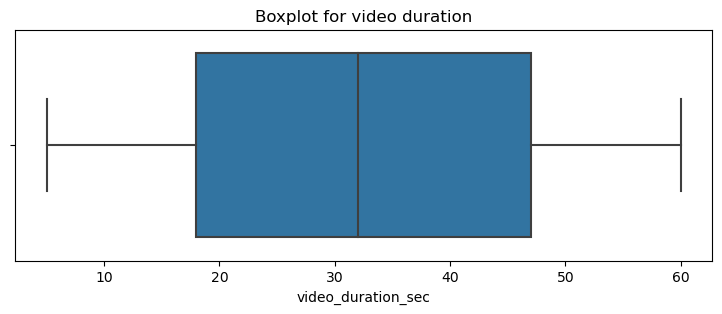

In [233]:
# Create a boxplot to visualize distribution of `video_duration_sec`
### YOUR CODE HERE ###
plt.figure(figsize=(9, 3))
plt.title('Boxplot for video duration')
sns.boxplot(x=data['video_duration_sec']);

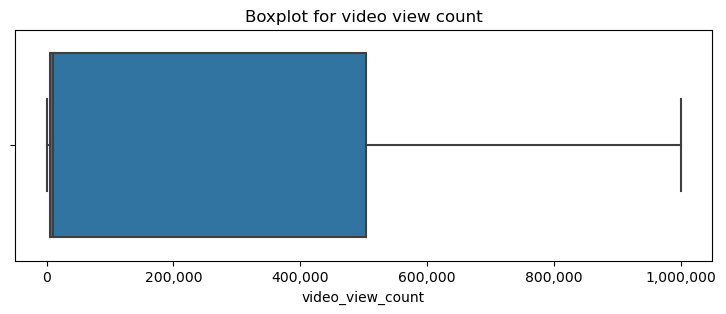

In [234]:
# Create a boxplot to visualize distribution of `video_view_count`
### YOUR CODE HERE ###
plt.figure(figsize=(9, 3))
ax=plt.gca()
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title('Boxplot for video view count')
sns.boxplot(x=data['video_view_count']);

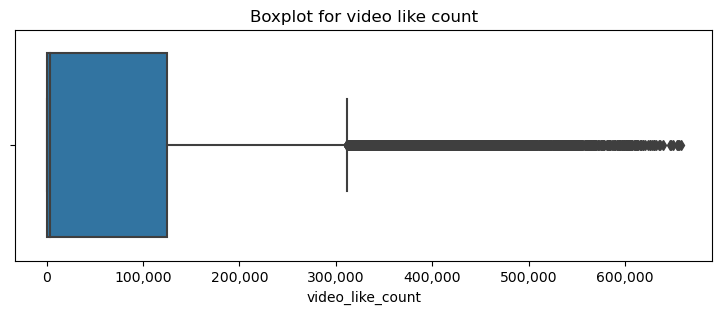

In [235]:
# Create a boxplot to visualize distribution of `video_like_count`
### YOUR CODE HERE ###
plt.figure(figsize=(9, 3))
ax=plt.gca()
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title('Boxplot for video like count')
sns.boxplot(x=data['video_like_count']);

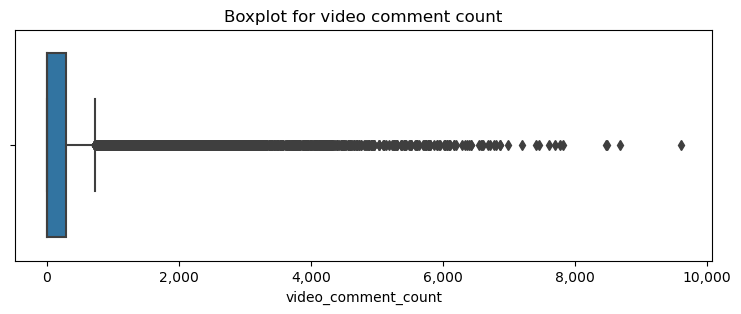

In [236]:
# Create a boxplot to visualize distribution of `video_comment_count`
### YOUR CODE HERE ###
plt.figure(figsize=(9, 3))
ax=plt.gca()
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title('Boxplot for video comment count')
sns.boxplot(x=data['video_comment_count']);

In [237]:
# Check for and handle outliers for video_like_count and video_comment_count
### YOUR CODE HERE ###
percentile25 = data['video_like_count'].quantile(0.25)
percentile75 = data['video_like_count'].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

data.loc[data['video_like_count']>upper_limit,'video_like_count']=upper_limit

percentile25 = data['video_comment_count'].quantile(0.25)
percentile75 = data['video_comment_count'].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

data.loc[data['video_comment_count']>upper_limit,'video_comment_count']=upper_limit

Check class balance of the target variable. Remember, the goal is to predict whether the user of a given post is verified or unverified.

In [238]:
# Check class balance
### YOUR CODE HERE ###
data["verified_status"].value_counts(normalize=True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

Approximately 93.7% of the dataset represents videos posted by unverified accounts and 6.3% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [239]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
### YOUR CODE HERE ###
from sklearn.utils import resample
majority = data[data['verified_status']=='not verified']
minority = data[data['verified_status']=='verified']
# Upsample the minority class (which is "verified")
### YOUR CODE HERE ###
upsampled_minority = resample(minority,replace=True,n_samples=len(majority),random_state=0)
# Combine majority class with upsampled minority class
### YOUR CODE HERE ###
even = pd.concat([majority,upsampled_minority])
# Display new class balance
### YOUR CODE HERE ###
even['verified_status'].value_counts(normalize=True)

verified_status
not verified    0.5
verified        0.5
Name: proportion, dtype: float64

Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [240]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
### YOUR CODE HERE ###
even[["verified_status", "video_transcription_text"]].groupby(by="verified_status")[["video_transcription_text"]].agg(lambda x:np.mean([len(text) for text in x]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [241]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
### YOUR CODE HERE ###
even['text_length'] = even['video_transcription_text'].apply(lambda x: len(x))

In [242]:
# Display first few rows of dataframe after adding new column
### YOUR CODE HERE ###
even.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [243]:
# Display first few rows of dataframe after adding new column
### YOUR CODE HERE ###
even['text_length'].describe()

count    35768.000000
mean        86.985350
std         20.311133
min         31.000000
25%         73.000000
50%         85.000000
75%         99.000000
max        182.000000
Name: text_length, dtype: float64

Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

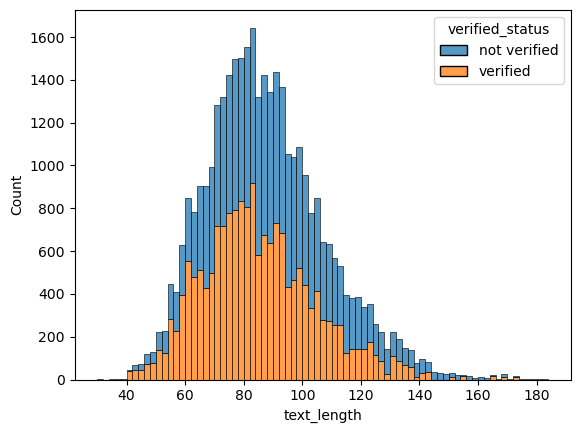

In [244]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
### YOUR CODE HERE ###
# plt.figure(figsize=(11,4))
sns.histplot(data=even,x='text_length',bins=range(30,186,2),hue='verified_status',multiple='stack');

### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [245]:
# Code a correlation matrix to help determine most correlated variables
### YOUR CODE HERE ###
even.corr(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.626385,-0.504015,-0.487096,-0.608773,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.005993,0.010515,0.008753,0.012674,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004494,0.002206,0.003989,-0.001086,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.856937,0.711313,0.690048,0.748361,0.244693
video_like_count,-0.626385,0.005993,0.004494,0.856937,1.000000,0.832146,0.805543,0.818032,0.216693
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.832146,1.000000,0.710117,0.671335,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.805543,0.710117,1.000000,0.793668,0.173396
video_comment_count,-0.608773,0.012674,-0.001086,0.748361,0.818032,0.671335,0.793668,1.000000,0.217661
text_length,-0.193677,-0.007083,-0.002981,0.244693,0.216693,0.171651,0.173396,0.217661,1.000000


Visualize a correlation heatmap of the data.

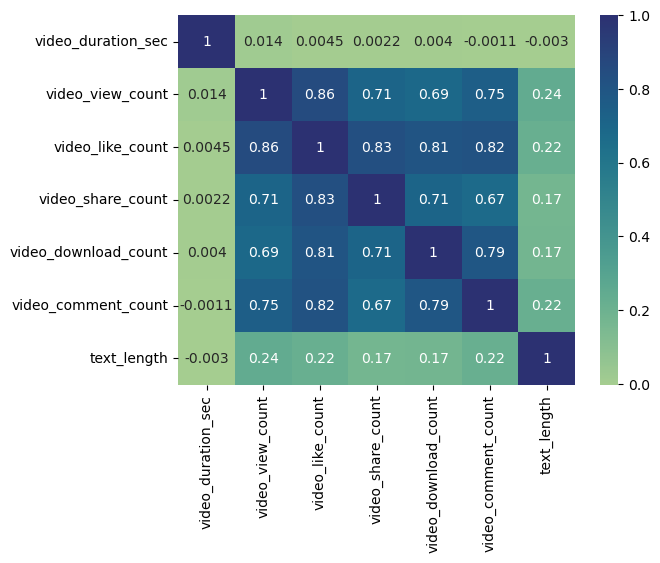

In [246]:
# Create a heatmap to visualize how correlated variables are
### YOUR CODE HERE ###
sns.heatmap(even[['video_duration_sec','video_view_count','video_like_count','video_share_count',
            'video_download_count','video_comment_count','text_length']].corr(),cmap='crest',annot=True);

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Question:** What variables are shown to be correlated in the heatmap?<br> **Response:** <br>video_like_count & video_view_count are shown to be highly correlated in the heatmap (0.86), and hence should not be put together.


<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3a. Select variables**

Set your Y and X variables.

Select the outcome variable.

In [247]:
# Select outcome variable
### YOUR CODE HERE ###
Y = even['verified_status']
even.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Select the features.

In [248]:
# Select features
### YOUR CODE HERE ###
X = even[['video_view_count','video_duration_sec','text_length','video_share_count','claim_status','author_ban_status']]

# Display first few rows of features dataframe
### YOUR CODE HERE ###
X.head()


,video_view_count,video_duration_sec,text_length,video_share_count,claim_status,author_ban_status
0,343296.0,59,97,241.0,claim,under review
1,140877.0,32,107,19034.0,claim,active
2,902185.0,31,137,2858.0,claim,active
3,437506.0,25,131,34812.0,claim,active
4,56167.0,19,128,4110.0,claim,active


### **Task 3b. Train-test split**

Split the data into training and testing sets.

In [249]:
# Split the data into training and testing sets
### YOUR CODE HERE ###
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

Confirm that the dimensions of the training and testing sets are in alignment.

In [250]:
# Get shape of each training and testing set
### YOUR CODE HERE ###
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape


((25037, 6), (25037,), (10731, 6), (10731,))

### **Task 3c. Encode variables**

Check the data types of the features.

In [251]:
# Check data types
### YOUR CODE HERE ###
X_train.dtypes

video_view_count      float64
video_duration_sec      int64
text_length             int64
video_share_count     float64
claim_status           object
author_ban_status      object
dtype: object

In [252]:
# Get unique values in `claim_status`
### YOUR CODE HERE ###
X_train['claim_status'].unique()

array(['claim', 'opinion'], dtype=object)

In [253]:
# Get unique values in `author_ban_status`
### YOUR CODE HERE ###
X_train['author_ban_status'].unique()

array(['active', 'under review', 'banned'], dtype=object)

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [254]:
# Select the training features that needs to be encoded
### YOUR CODE HERE ###
encode = X_train[['claim_status','author_ban_status']]

# Display first few rows
### YOUR CODE HERE ###
encode.head()

,claim_status,author_ban_status
9019,claim,active
4365,claim,active
17724,opinion,active
16946,opinion,active
11701,opinion,active


In [255]:
# Set up an encoder for one-hot encoding the categorical features
### YOUR CODE HERE ###
encoder = OneHotEncoder(drop='first', sparse_output=False)

In [256]:
# Fit and transform the training features using the encoder
### YOUR CODE HERE ###
X_train_encoded = encoder.fit_transform(encode)


In [257]:
# Get feature names from encoder
### YOUR CODE HERE ###
names = encoder.get_feature_names_out()
names

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [258]:
# Display first few rows of encoded training features
### YOUR CODE HERE ###
X_train_encoded

array([[0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [259]:
# Place encoded training features (which is currently an array) into a dataframe
### YOUR CODE HERE ###
encoded_df = pd.DataFrame(data=X_train_encoded,columns=encoder.get_feature_names_out())

# Display first few rows
### YOUR CODE HERE ###
encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [260]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
### YOUR CODE HERE ###
# X_train.drop(['claim_status','author_ban_status'],axis=1,inplace=True)
X_train.reset_index(inplace=True,drop=True)
X_train.head()

,video_view_count,video_duration_sec,text_length,video_share_count,claim_status,author_ban_status
0,599928.0,52,67,13752.0,claim,active
1,623816.0,25,100,59817.0,claim,active
2,6575.0,44,91,9.0,opinion,active
3,389.0,30,68,40.0,opinion,active
4,4244.0,9,83,94.0,opinion,active


In [261]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`full`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
### YOUR CODE HERE ###
full = pd.concat([X_train,encoded_df],axis=1)
full.drop(['claim_status','author_ban_status'],axis=1,inplace=True)
# Display first few rows
### YOUR CODE HERE ###
full.head()

,video_view_count,video_duration_sec,text_length,video_share_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,599928.0,52,67,13752.0,0.0,0.0,0.0
1,623816.0,25,100,59817.0,0.0,0.0,0.0
2,6575.0,44,91,9.0,1.0,0.0,0.0
3,389.0,30,68,40.0,1.0,0.0,0.0
4,4244.0,9,83,94.0,1.0,0.0,0.0


Check the data type of the outcome variable.

In [262]:
# Check data type of outcome variable
### YOUR CODE HERE ###
Y_train.dtypes

dtype('O')

In [263]:
# Get unique values of outcome variable
### YOUR CODE HERE ###
Y_train.unique()

array(['verified', 'not verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [264]:
# Set up an encoder for one-hot encoding the categorical outcome variable
### YOUR CODE HERE ###
y_encoder = OneHotEncoder(drop='first',sparse_output=False)

In [265]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
### YOUR CODE HERE ###
Y_train_encoded = y_encoder.fit_transform(Y_train.values.reshape(-1,1)).ravel()
# Display the encoded training outcome variable
### YOUR CODE HERE ###
Y_train_encoded


array([1., 0., 1., ..., 1., 1., 0.])

### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [266]:
# Construct a logistic regression model and fit it to the training set
### YOUR CODE HERE ###
clf = LogisticRegression().fit(full,Y_train_encoded)


<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [267]:
# Select the testing features that needs to be encoded
### YOUR CODE HERE ###
X_test_to_encode = X_test[['claim_status','author_ban_status']]
# Display first few rows
### YOUR CODE HERE ###
X_test_to_encode.head()

,claim_status,author_ban_status
19021,opinion,active
14908,opinion,active
2902,claim,active
5865,claim,active
12086,opinion,active


In [268]:
# Transform the testing features using the encoder
### YOUR CODE HERE ###
X_test_encoded = encoder.transform(X_test_to_encode)

# Display first few rows of encoded testing features
### YOUR CODE HERE ###
X_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [269]:
# Place encoded testing features (which is currently an array) into a dataframe
### YOUR CODE HERE ###
encoded_x_test_df = pd.DataFrame(data=X_test_encoded,columns=encoder.get_feature_names_out())

# Display first few rows
### YOUR CODE HERE ###
encoded_x_test_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [270]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
### YOUR CODE HERE ###
X_test.drop(['claim_status','author_ban_status'],axis=1,inplace=True)
X_test.reset_index(inplace=True,drop=True)
X_test.head()

,video_view_count,video_duration_sec,text_length,video_share_count
0,2118.0,41,50,57.0
1,5701.0,27,78,157.0
2,449767.0,31,127,75385.0
3,792813.0,19,105,56597.0
4,2044.0,54,51,68.0


In [271]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
### YOUR CODE HERE ###
X_test_final = pd.concat([X_test,encoded_x_test_df],axis =1)

# Display first few rows
### YOUR CODE HERE ###
X_test_final.head()

,video_view_count,video_duration_sec,text_length,video_share_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,2118.0,41,50,57.0,1.0,0.0,0.0
1,5701.0,27,78,157.0,1.0,0.0,0.0
2,449767.0,31,127,75385.0,0.0,0.0,0.0
3,792813.0,19,105,56597.0,0.0,0.0,0.0
4,2044.0,54,51,68.0,1.0,0.0,0.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [272]:
# Use the logistic regression model to get predictions on the encoded testing set
### YOUR CODE HERE ###
y_pred = clf.predict(X_test_final)

Display the predictions on the encoded testing set.

In [273]:
# Display the predictions on the encoded testing set
### YOUR CODE HERE ###
y_pred

array([1., 1., 0., ..., 1., 1., 1.])

Display the true labels of the testing set.

In [274]:
# Display the true labels of the testing set
### YOUR CODE HERE ###
Y_test

19021        verified
14908        verified
2902         verified
5865     not verified
12086    not verified
             ...     
15450    not verified
12343    not verified
18639    not verified
11206        verified
12528        verified
Name: verified_status, Length: 10731, dtype: object

Encode the true labels of the testing set so it can be compared to the predictions.

In [275]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
### YOUR CODE HERE ###
Y_test_encode = y_encoder.transform(Y_test.values.reshape(-1,1)).ravel()

# Display the encoded testing outcome variable
Y_test_encode

array([1., 1., 1., ..., 0., 1., 1.])

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [276]:
# Get shape of each training and testing set
### YOUR CODE HERE ###
full.shape,Y_train_encoded.shape,X_test_final.shape,Y_test_encode.shape

((25037, 7), (25037,), (10731, 7), (10731,))

### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

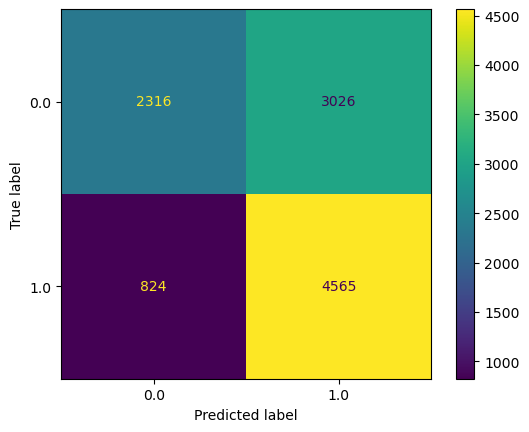

In [277]:
# Display plot
### YOUR CODE HERE ###
cm = metrics.confusion_matrix(Y_test_encode,y_pred,labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=clf.classes_)
disp.plot();

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [278]:
# Create a classification report
### YOUR CODE HERE ###
from sklearn.metrics import classification_report
target_labels = ['not_verified','verified']
print(classification_report(Y_test_encode,y_pred,target_names=target_labels))

              precision    recall  f1-score   support

not_verified       0.74      0.43      0.55      5342
    verified       0.60      0.85      0.70      5389

    accuracy                           0.64     10731
   macro avg       0.67      0.64      0.62     10731
weighted avg       0.67      0.64      0.63     10731



### **Task 4c. Interpret model coefficients**

In [279]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
### YOUR CODE HERE ###
df = pd.DataFrame(data={"Feature Name":clf.feature_names_in_,"Model Coefficient":clf.coef_[0]})
df.sort_values(by='Model Coefficient',inplace=True,ascending=False)
df['Model Coefficient'] = df['Model Coefficient'].apply(lambda x: f"{x:.10f}")
df

,Feature Name,Model Coefficient
2,text_length,0.0034820548
1,video_duration_sec,0.0013386616
4,claim_status_opinion,0.0000592136
3,video_share_count,0.0000043173
6,author_ban_status_under review,0.0000001019
5,author_ban_status_banned,-0.0000024124
0,video_view_count,-0.0000026509


In [280]:
recall = metrics.recall_score(Y_test_encode,y_pred)
accuracy = metrics.accuracy_score(Y_test_encode,y_pred)
precision = metrics.precision_score(Y_test_encode,y_pred)
print(f'Recall score: {recall}')
print(f'Accuracy score: {accuracy}')
print(f'Precision score: {precision}')

Recall score: 0.8470959361662647
Accuracy score: 0.6412263535551207
Precision score: 0.6013700434725333


### **Task 4d. Conclusion**

1. What are the key takeaways from this project?

2. What results can be presented from this project?

**Response:**<br>
• With a low recall score for unverified accounts (0.43), the model does not do well in recognising unverified accounts. <br>
• There are some stronger predictors of verified status. These variables include text length, duration of TikTok videos, and the claim status of the videos. All these variables have a positive model coefficient, which signifies that TikTok videos that are longer in text length, video duration, and is categorised as 'claim' will likely be posted by a verified account. <br>
• Variables such as 'video_view_count' and 'video_share_count' were added into the model although they have a correlation score of 0.71, which is considered high by Andrews University. The model could have been improved if only 1 out of the 2 variables were used in constructing the model, as this would further minimise multicollinearity and provide more reliable coefficient estimates. <br> https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm
